# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
# Read data
housing = pd.read_csv("datasets/housing/housing.csv")

## Minor exploration

In [29]:
def general_info(data, col_to_value_count=None, col_to_unique_values=None):
	guion = "-" * 50
	# Display general information about the data
	print(f"Data info:")
	print(guion)
	print(data.info())
	print(f"\n\nData head:")
	print(guion)
	print(data.head())
	print(f"\n\nData describe:")
	print(guion)
	print(data.describe())
	if col_to_value_count is not None:
		print(f"\n\nData value count for {col_to_value_count}:")
		print(guion)
		print(data[col_to_value_count].value_counts())
	if col_to_unique_values is not None:
		print(f"\n\nData unique values for {col_to_unique_values}:")
		print(guion)
		print(data[col_to_unique_values].unique())

In [30]:
general_info(housing, col_to_value_count="ocean_proximity")

Data info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
None


Data head:
--------------------------------------------------
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

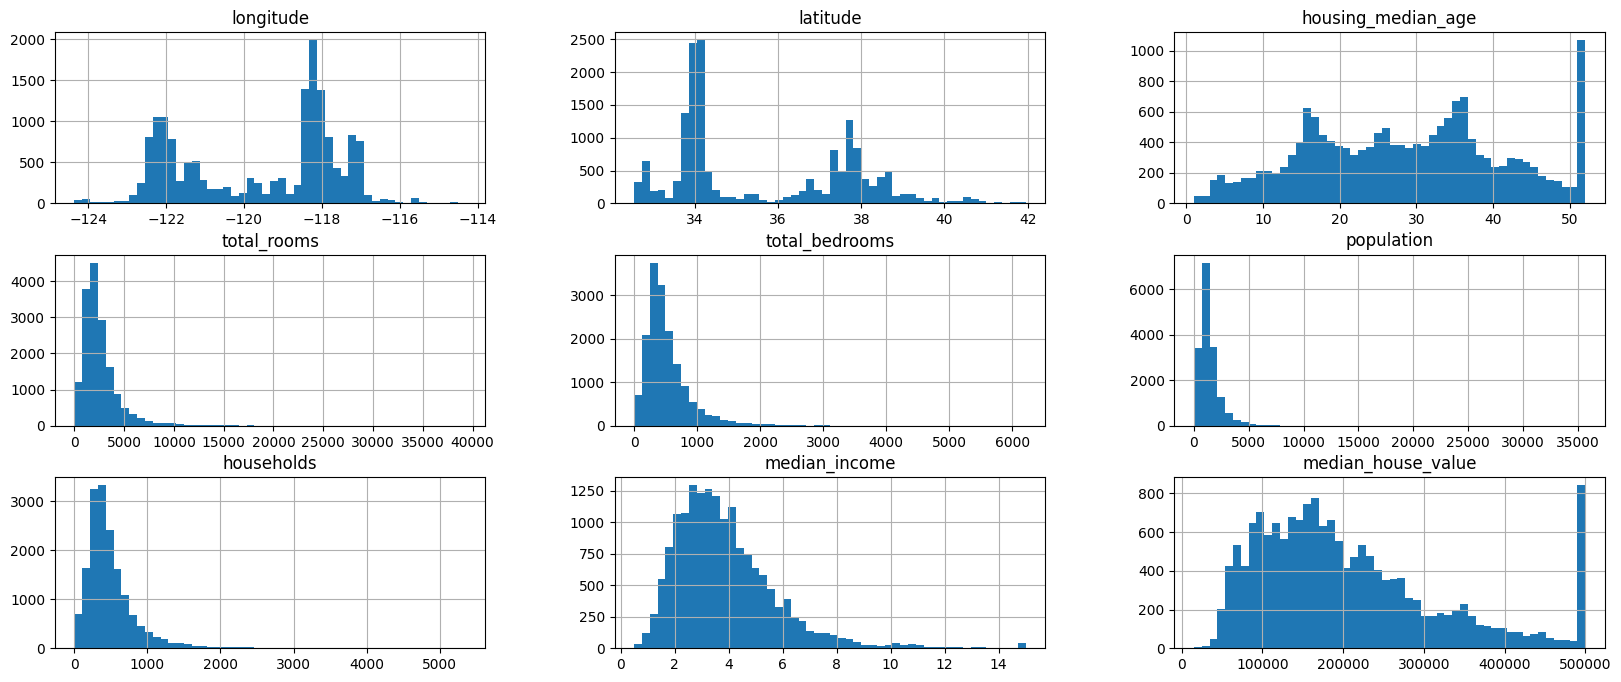

In [31]:
housing.hist(bins=50, figsize=(20,8))

In [32]:
# Create income category attribute (5 categories) to have a representative train and test set
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

## Divide data into train and test

In [33]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])

In [39]:
# Check distribution of income categories in the train, test and whole set

df = pd.DataFrame({'Whole set': housing['income_cat'].value_counts() / len(housing), 'Train set': train_set['income_cat'].value_counts() / len(train_set), 'Test set': test_set['income_cat'].value_counts() / len(test_set)})
df['Train set % error'] = (df['Whole set'] - df['Train set']) / df['Whole set'] * 100
df['Test set % error'] = (df['Whole set'] - df['Test set']) / df['Whole set'] * 100
df.sort_index()

,Whole set,Train set,Test set,Train set % error,Test set % error
income_cat,,,,,
1,0.039789,0.039746,0.039964,0.109618,-0.438373
2,0.318859,0.318873,0.318801,-0.004542,0.018165
3,0.350594,0.350594,0.350590,-0.000224,0.000894
4,0.176296,0.176319,0.176203,-0.013131,0.052512
5,0.114462,0.114467,0.114441,-0.004542,0.018165


In [40]:
# Now we drop the income_cat attribute so the data is back to its original state
for set_ in (train_set, test_set):
	set_.drop("income_cat", axis=1, inplace=True)

In [41]:
# I only work with the training set
housing = train_set.copy()

# Visualizations

<Axes: xlabel='longitude', ylabel='latitude'>

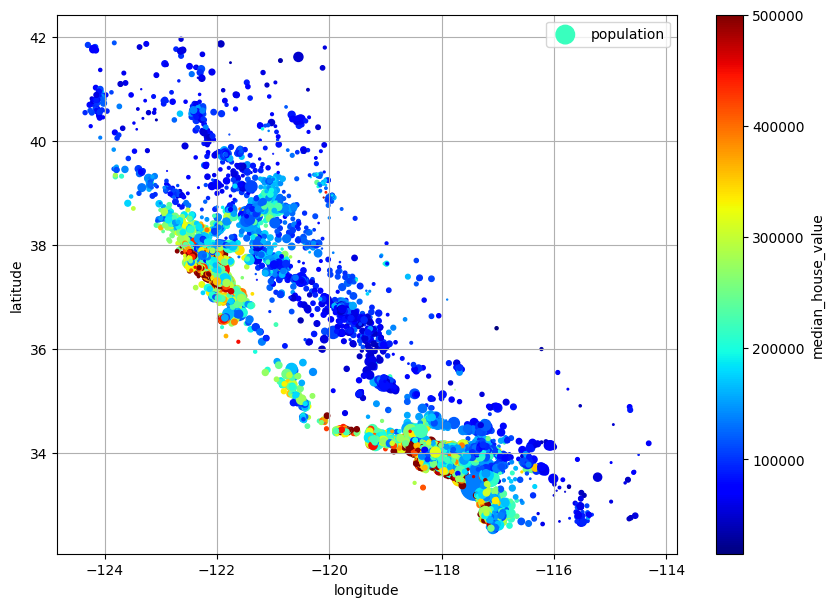

In [42]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
    s=housing["population"] / 100, label="population", c="median_house_value",
	cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))

In [43]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689127
total_rooms           0.137820
housing_median_age    0.113667
households            0.066564
total_bedrooms        0.049841
population           -0.023055
longitude            -0.049097
latitude             -0.140593
Name: median_house_value, dtype: float64

In [47]:
correlated = corr_matrix["median_house_value"][corr_matrix["median_house_value"].abs() > 0.1].sort_values(ascending=False)
correlated

median_house_value    1.000000
median_income         0.689127
total_rooms           0.137820
housing_median_age    0.113667
latitude             -0.140593
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

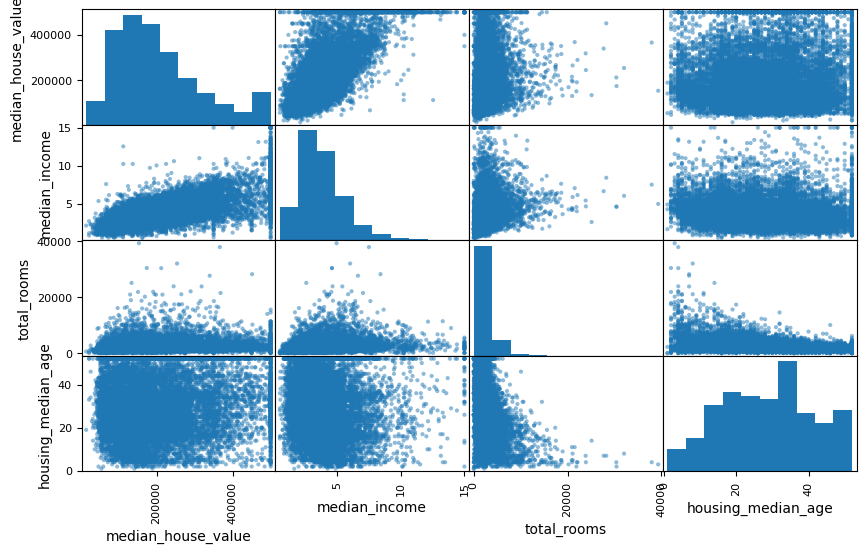

In [52]:
# Create attributes variable to check for correlation between them
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

from pandas.plotting import scatter_matrix
scatter_matrix(housing[attributes], figsize=(10, 6))

# Median income seems to be the most promising attribute to predict median house value

<Axes: xlabel='median_income', ylabel='median_house_value'>

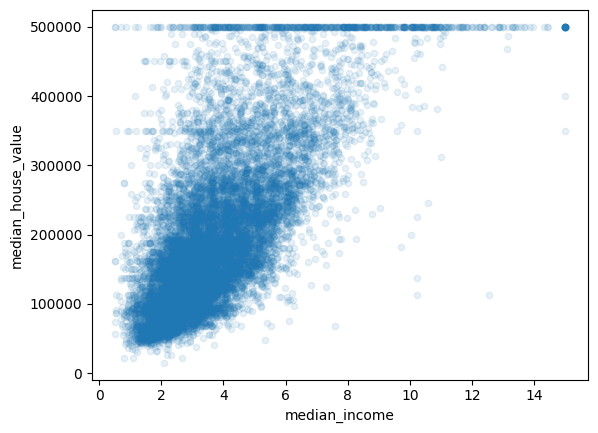

In [53]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

Observations:
- Uppward trend
- Capped at 500k (might be an issue)
- Horizontal line around 350k (darker) and 450k

## Attribute engineering

In [56]:
# Defining some attributes as combination of others
# Now we check the correlation of these new attributes with the median house value
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"] / housing["households"]
housing["rooms_per_population"] = housing["total_rooms"] / housing["population"]
housing["bedrooms_per_population"] = housing["total_bedrooms"] / housing["population"]

In [58]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689127
rooms_per_population        0.212786
rooms_per_household         0.159831
total_rooms                 0.137820
housing_median_age          0.113667
bedrooms_per_population     0.076780
households                  0.066564
total_bedrooms              0.049841
population_per_household   -0.020827
population                 -0.023055
bedrooms_per_household     -0.042117
longitude                  -0.049097
latitude                   -0.140593
bedrooms_per_room          -0.271023
Name: median_house_value, dtype: float64

Observations:
- Some of the new attributes have a significant (>0.1) possitive or negative correlation with the target

## Prepare data for training

In [59]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

### Missing values

In [60]:
# We need to deal with missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [62]:
housing_numerical = housing.select_dtypes(include=[np.number])
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [65]:
# Check imputer statistics and median values
print(f"Imputer: {imputer.statistics_}")
print(f"Median values: {housing_numerical.median().values}")

Imputer: [-118.5      34.26     29.     2108.      431.     1161.      407.
    3.5363]
Median values: [-118.5      34.26     29.     2108.      431.     1161.      407.
    3.5363]


In [66]:
# I want pandas DF instead of numpy array
from sklearn import set_config
set_config(transform_output="pandas")

In [70]:
# Fill missing values
housing_numerical = imputer.transform(housing_numerical)

# Quick check
housing_numerical.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Categorical attributes

In [73]:
housing_categorial = housing.select_dtypes(exclude=[np.number])
housing_categorial.value_counts()

ocean_proximity
<1H OCEAN          5844
INLAND             4178
NEAR OCEAN         1705
NEAR BAY           1480
ISLAND                2
Name: count, dtype: int64

In [77]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_categorial_encoded = ordinal_encoder.fit_transform(housing_categorial)
housing_categorial_encoded.head()

,ocean_proximity
3465,0.0
15290,4.0
10779,0.0
14038,4.0
1100,1.0


In [78]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Problem:
- Numerical proximity is considered as categorial proximity

Solution:
- One-hot encoding

In [80]:
set_config(transform_output="default") # Reset to default (sparse matrix), avoid error

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
housing_categorial_1hot = one_hot_encoder.fit_transform(housing_categorial)
housing_categorial_1hot

<13209x5 sparse matrix of type '<class 'numpy.float64'>'
	with 13209 stored elements in Compressed Sparse Row format>